# <h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<h4> Λεωνίδας Αβδελάς, 03113182 </h4>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [114]:
%matplotlib inline

import matplotlib
import itertools
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>/
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
n=120
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [4]:
#import football.gml from local file using nx.read_gml
football = nx.read_gml('data/football.gml')

In [5]:
#check if football is directed
nx.is_directed(football)

False

Nodes of football 115


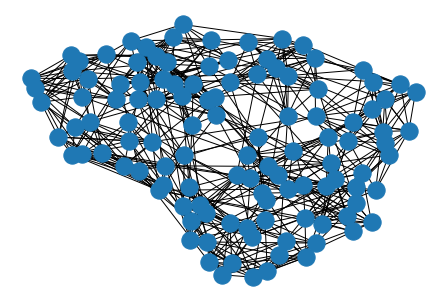

In [204]:
#visualize football
nx.draw_spring(football)
print('Nodes of football: %d' % len(football.nodes()))

In [7]:
#import lesmis.gml
lesmis = nx.read_gml('data/lesmis.gml')

In [10]:
#check if lesmis is directed
nx.is_directed(lesmis)

False

Nodes of lesmis: 77


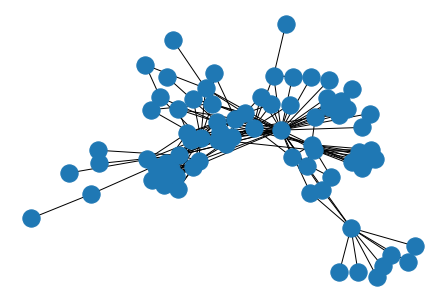

In [205]:
#visualize lesmis
nx.draw_spring(lesmis)
print('Nodes of lesmis: %d' % len(lesmis.nodes()))

In [12]:
#import dolphins.gml
dolphins = nx.read_gml('data/dolphins.gml')

In [13]:
#check if dolphins is directed
nx.is_directed(dolphins)

False

Nodes of dolphins: 62


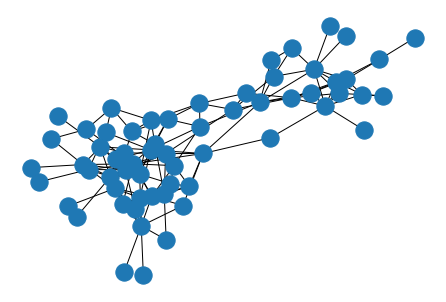

In [206]:
#visualize dolphins
nx.draw_spring(dolphins)
print('Nodes of dolphins: %d' % len(dolphins.nodes()))

In [19]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

football = nx.relabel_nodes(nfootball,football_map)
lesmis = nx.relabel_nodes(nlesmis,lesmis_map)
dolphins = nx.relabel_nodes(ndolphins,dolphins_map)

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [36]:
def find_degree(G):
    degrees = list()
    for n in G.nodes:
        degrees.append((n, G.degree(n)))
    return degrees

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(football)
lesmis_degree = find_degree(lesmis)
dolphins_degree = find_degree(dolphins)

def degree_hist(G_degree):
    values = [dgs[1] for dgs in G_degree]
    plt.hist(values)

mean_degree_REG = np.mean([dgs[1] for dgs in REG_degree])
mean_degree_RGER = np.mean([dgs[1] for dgs in RGER_degree])
mean_degree_RGG = np.mean([dgs[1] for dgs in RGG_degree])
mean_degree_SW = np.mean([dgs[1] for dgs in SW_degree])
mean_degree_SF = np.mean([dgs[1] for dgs in SF_degree])
mean_degree_football = np.mean([dgs[1] for dgs in football_degree])
mean_degree_lesmis = np.mean([dgs[1] for dgs in lesmis_degree])
mean_degree_dolphins = np.mean([dgs[1] for dgs in dolphins_degree])

Mean REG degree: 4.000000


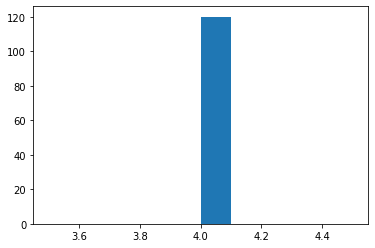

In [37]:
plt.figure()
degree_hist(REG_degree)
print("Mean REG degree: %f" % mean_degree_REG)

Mean RGER degree: 12.500000


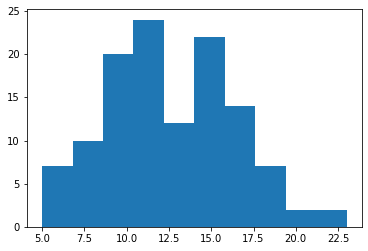

In [38]:
plt.figure()
degree_hist(RGER_degree)
print("Mean RGER degree: %f" % mean_degree_RGER)

Mean RGG degree: 7.150000


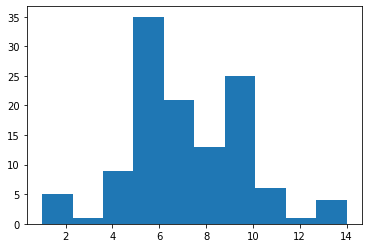

In [39]:
plt.figure()
degree_hist(RGG_degree)
print("Mean RGG degree: %f" % mean_degree_RGG)

Mean SF degree: 7.733333


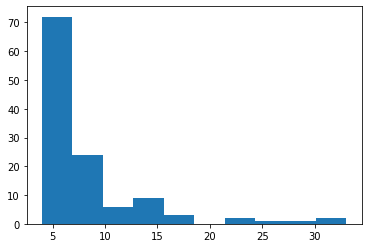

In [40]:
plt.figure()
degree_hist(SF_degree)
print("Mean SF degree: %f" % mean_degree_SF)

Mean SW degree: 4.000000


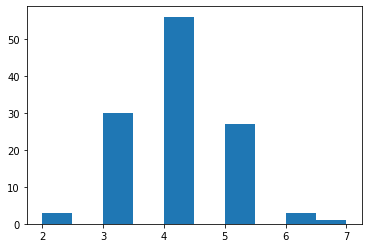

In [41]:
plt.figure()
degree_hist(SW_degree)
print("Mean SW degree: %f" % mean_degree_SW)

Mean football degree: 10.660870


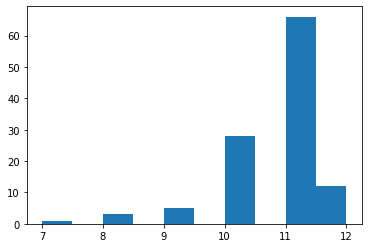

In [42]:
plt.figure()
degree_hist(football_degree)
print("Mean football degree: %f" % mean_degree_football)

Mean lesmis degree: 6.597403


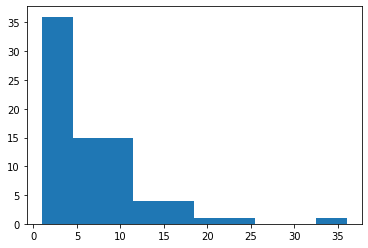

In [43]:
plt.figure()
degree_hist(lesmis_degree)
print("Mean lesmis degree: %f" % mean_degree_lesmis)

Mean dolphins degree: 5.129032


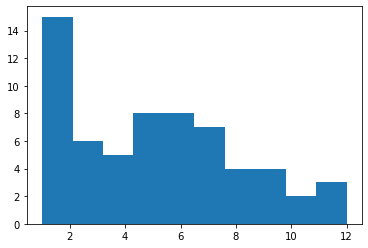

In [44]:
plt.figure()
degree_hist(dolphins_degree)
print("Mean dolphins degree: %f" % mean_degree_dolphins)

**Football**: Αυτός ο γράφος δεν μοιάζει ιδιαίτερα με κάποιον άλλο που έχουμε δει. Αυτό συμβαίνει γιατί υπάρχουν πολλές συνδέσεις με μεγάλο βαθμό και λίγες με μικρό. Αν έπρεπε να τον αντιστοιχήσουμε σε κάποια γνωστή τοπολογία θα επιλέγαμε ένα RGG με πολύ μεγάλο R.

**Lesmis**: Ο γράφος αυτός μοιάζει με Scale Free, λόγω της εκθετικής πτώσης των βαθμών των κόμβων, η οποία είναι χαρακτηριστικό των γράφων αυτής της κατηγορίας.

**Dolphins**: Και αυτός ο γράφος είναι Scale Free, αλλά αυτή την φορά το k είναι αρκετά μικρότερο.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [47]:
def clust_coef(G):
    return list(nx.clustering(G).values())

REG_cc = clust_coef(REG) 
RGER_cc = clust_coef(RGER) 
RGG_cc = clust_coef(RGG) 
SF_cc = clust_coef(SF) 
SW_cc = clust_coef(SW) 
football_cc = clust_coef(football)
lesmis_cc = clust_coef(lesmis)
dolphins_cc= clust_coef(dolphins)

def cc_hist(G_cc):
    plt.hist(G_cc)
    
mean_cc_REG = np.mean(REG_cc)
mean_cc_RGER = np.mean(RGER_cc)
mean_cc_RGG = np.mean(RGG_cc)
mean_cc_SW = np.mean(SW_cc)
mean_cc_SF = np.mean(SF_cc)
mean_cc_football = np.mean(football_cc)
mean_cc_lesmis = np.mean(lesmis_cc)
mean_cc_dolphins = np.mean(dolphins_cc)

Mean REG CC 0.500000


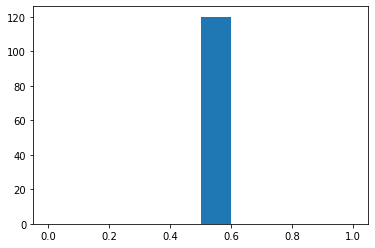

In [48]:
plt.figure()
cc_hist(REG_cc)
print("Mean REG CC %f" % mean_cc_REG)

Mean RGER CC 0.107306


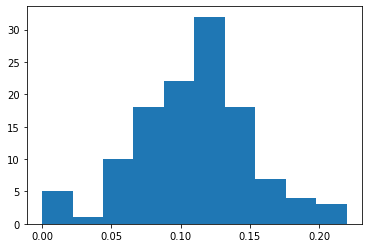

In [49]:
plt.figure()
cc_hist(RGER_cc)
print("Mean RGER CC %f" % mean_cc_RGER)

Mean RGG CC 0.631065


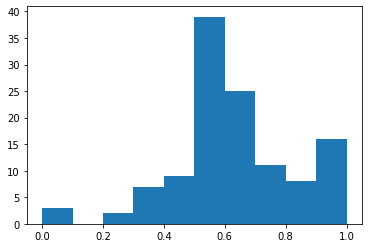

In [50]:
plt.figure()
cc_hist(RGG_cc)
print("Mean RGG CC %f" % mean_cc_RGG)

Mean SF CC 0.500000


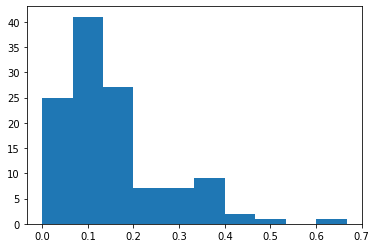

In [51]:
plt.figure()
cc_hist(SF_cc)
print("Mean SF CC %f" % mean_cc_REG)

Mean SW CC 0.177024


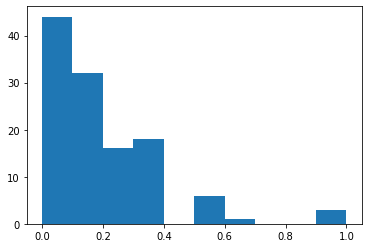

In [53]:
plt.figure()
cc_hist(SW_cc)
print("Mean SW CC %f" % mean_cc_SW)

Mean football CC 0.403216


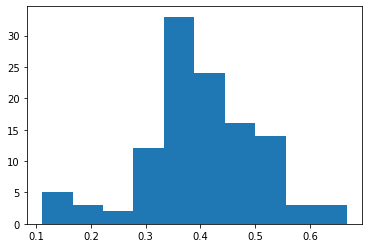

In [54]:
plt.figure()
cc_hist(football_cc)
print("Mean football CC %f" % mean_cc_football)

Mean lesmis CC 0.573137


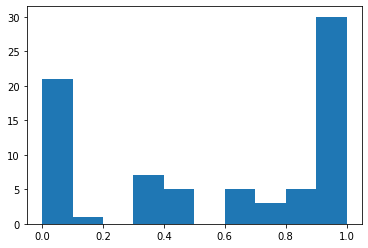

In [55]:
plt.figure()
cc_hist(lesmis_cc)
print("Mean lesmis CC %f" % mean_cc_lesmis)

Mean dolphins CC 0.258958


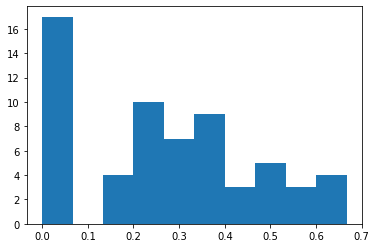

In [56]:
plt.figure()
cc_hist(dolphins_cc)
print("Mean dolphins CC %f" % mean_cc_dolphins)

**Football**: Όπως βλέπουμε και εδώ, η κατανομή του Clustering Coefficient μοιάζει πολύ με του RGG, που ας οδηγεί ξανα στο συμπέρασμα ότι αυτός ο γράφος μοιάζει να είναι RGG.

**LesMis**: Εδώ βλέπουμε ότι ο γράφος από το Les Miserables έχει πολύ ψηλό CC, γεγονός που το κάνει να διαφέρει από όλα τα προηγούμενα δίκτυα που γνωρίζουμε. Βάση αυτού του γεγονότος δεν μπορύμε να το προσδιορίσουμε σε κάποια κατηγορία γράφων.

**Dolphins**: Εδώ ο γράφος μοιάζει με SF ή SW. Με βάση τον συνδιασμό του CC και του βαθμού, θα το θεωρήσουμε ως SF.

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [71]:
def ego_centrality(G):
    ego_centrality = list()
    for n in G.nodes():
        ego_G = nx.ego_graph(G, n)
        A = nx.adjacency_matrix(ego_G).todense()
        geodesics = np.triu(np.multiply(np.linalg.matrix_power(A, 2), (np.ones(A.shape) - A)))
        entries = geodesics[np.nonzero(geodesics)]
        sum = 0
        for e in entries:
            sum = sum + 1/e
        ego_centrality.append(round(sum, 4))
    return ego_centrality

REG_ebtw = ego_centrality(REG) 
RGER_ebtw = ego_centrality(RGER) 
RGG_ebtw = ego_centrality(RGG) 
SF_ebtw = ego_centrality(SF) 
SW_ebtw = ego_centrality(SW) 
nfootball_ebtw = ego_centrality(football) 
nlesmis_ebtw = ego_centrality(lesmis) 
ndolphins_ebtw = ego_centrality(dolphins)

def egobtw_hist(G_ebtw): 
    plt.hist(G_ebtw)
    
mean_ebtw_REG = np.mean(REG_ebtw)
mean_ebtw_RGER = np.mean(RGER_ebtw)
mean_ebtw_RGG = np.mean(RGG_ebtw)
mean_ebtw_SW = np.mean(SW_ebtw)
mean_ebtw_SF = np.mean(SF_ebtw)
mean_ebtw_football = np.mean(nfootball_ebtw)
mean_ebtw_lesmis = np.mean(nlesmis_ebtw)
mean_ebtw_dolphins = np.mean(ndolphins_ebtw)

Mean REG Ego Betweenness 3.916700


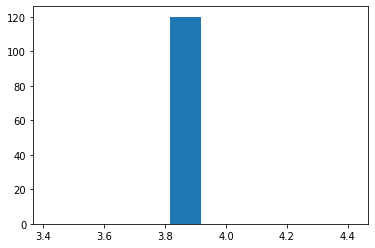

In [92]:
plt.figure()
egobtw_hist(REG_ebtw)
print("Mean REG Ego Betweenness %f" % mean_ebtw_REG)

Mean RGER ego betweenness 71.537259


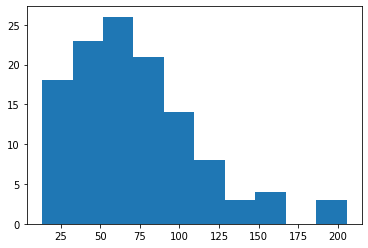

In [93]:
plt.figure()
egobtw_hist(RGER_ebtw)
print("Mean RGER ego betweenness %f" % mean_ebtw_RGER)

Mean RGG  ego betweenness 7.493255


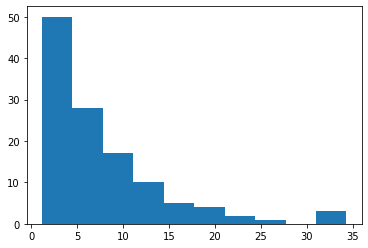

In [94]:
plt.figure()
egobtw_hist(RGG_ebtw)
print("Mean RGG  ego betweenness %f" % mean_ebtw_RGG)

Mean  SF ego betweenness 38.017561


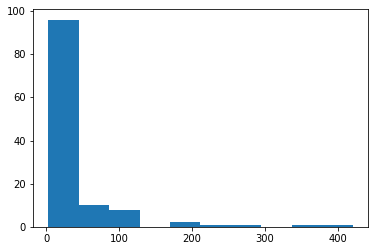

In [95]:
plt.figure()
egobtw_hist(SF_ebtw)
print("Mean  SF ego betweenness %f" % mean_ebtw_SF)

Mean SW  ego betweenness 8.476737


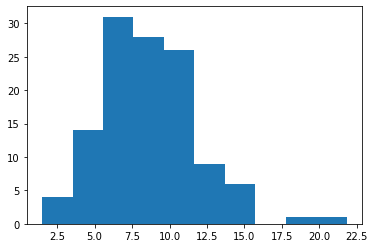

In [96]:
plt.figure()
egobtw_hist(SW_ebtw)
print("Mean SW  ego betweenness %f" % mean_ebtw_SW)

Mean football ego betweenness 28.428095


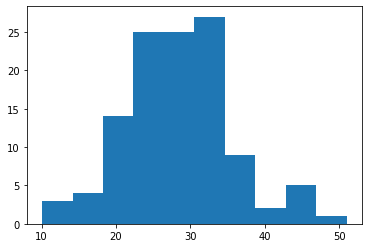

In [97]:
plt.figure()
egobtw_hist(nfootball_ebtw)
print("Mean football ego betweenness %f" % mean_ebtw_football)

Mean lesmis ego betweenness 15.378773


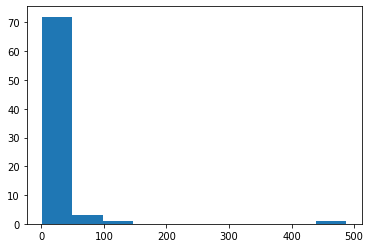

In [98]:
plt.figure()
egobtw_hist(nlesmis_ebtw)
print("Mean lesmis ego betweenness %f" % mean_ebtw_lesmis)

Mean dolphins ego betweenness 11.407568


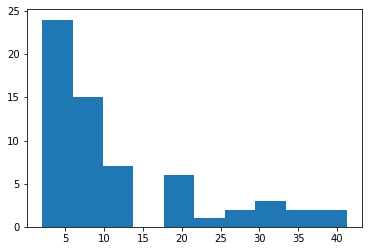

In [99]:
plt.figure()
egobtw_hist(ndolphins_ebtw)
print("Mean dolphins ego betweenness %f" % mean_ebtw_dolphins)

**Football**: Τα χαρακτηριστικά του γράφου μοίαζουν με RGER περισσότερο από οτιδήποτε άλλο. </br>
**LesMis**: Το Ego betweeness του γράφου αυτού μοιάζει πολύ με του Scale Free, οπότε θα τον προσδιορίζαμε σε αυτή την κατηγορία. </br>
**Dolphins**: Το Ego betweeness του γράφου μοιάζει με αυτό του RGG.

<h3> Συνολικά </h3>

**Football**: Ο γράφος θα μπορούσε να χαρακτηριστεί ως RGG, με βάση τα πρώτα δύο χαρακτηριστικά που μελετήσαμε. </br>
**LesMis**: Θα κατατάσαμε αυτό το γράφο στην κατηγορία των Scale Free, αν και δεν ταιριάζει απόλυτα με τα χαρακτηριστικά αυτής της κατηγορίας. </br>
**Dolphins**: Συνολίκα θα τον κατατάσσαμε στην κατηγορία του SF γράφου, αφού τα περισσότερα χαρακτηριστκά ταιριάζουν με αυτό.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [208]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [312]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_GN(G,k=50):
    best_mod = - sys.maxsize
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    for communities in limited:
        test = nx.algorithms.community.quality.modularity(G, communities)
        if(test > best_mod):
            best_mod = test
            comm = communities
    return [list(item) for item in comm]

In [235]:
comd_GN_REG = comd_GN(REG)
comd_GN_RGER = comd_GN(RGER)
comd_GN_RGG = comd_GN(RGG)
comd_GN_SF = comd_GN(SF)
comd_GN_SW = comd_GN(SW)
comd_GN_football = comd_GN(football)
comd_GN_lesmis = comd_GN(lesmis)
comd_GN_dolphins = comd_GN(dolphins) 

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [366]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_SP(G,k = 50):
    best_mod = - sys.maxsize
    nodes = list(G.nodes())
    adj_mat = nx.to_numpy_matrix(G)
    for i in range(1, k):
        comm = dict()
        sc = SpectralClustering(n_clusters=i, affinity='precomputed').fit(adj_mat)
        for x in sc.labels_:
            if x not in comm:
                comm[x] = list()
        for x in range(len(sc.labels_)):
            comm[sc.labels_[x]].append(nodes[x])
        test = nx.algorithms.community.quality.modularity(G, list(comm.values()))
        if(test > best_mod):
            best_mod = test
            communities = comm
    return list(communities.values())

In [367]:
REG_SP = comd_SP(REG)
RGER_SP = comd_SP(RGER)
RGG_SP = comd_SP(RGG)
SF_SP = comd_SP(SF)
SW_SP = comd_SP(SW)
football_SP = comd_SP(football)
lesmis_SP = comd_SP(lesmis)
dolphins_SP = comd_SP(dolphins)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [250]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    mm = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    return [list(m) for m in mm]

def measure_modularity(G, communities):
    return nx.algorithms.community.quality.modularity(G, communities)

In [254]:
REG_MM = comd_MM(REG)
RGER_MM = comd_MM(RGER)
RGG_MM = comd_MM(RGG)
SF_MM = comd_MM(SF)
SW_MM = comd_MM(SW)
football_MM = comd_MM(football)
lesmis_MM = comd_MM(lesmis)
dolphins_MM = comd_MM(dolphins)

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [384]:
def visual_com(G, partition, title):
#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges
    mapping = list()
    for n in G.nodes():
        for i in range(len(partition)):
            if n in partition[i]:
                mapping.append(i)
    print(title + ' method')
    print('Number of communities: %d' %(max(mapping)+1))
#    for i in range(len(mapping)):
#        mapping[i] = colors[mapping[i]]
#    nx.draw_spring(G, cmap = 'seismic', node_color = mapping, node_size=100, with_labels=False)
    pos = nx.spring_layout(G)  # compute graph layout
    fig = plt.figure(figsize=(10, 10)) 
    nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.hsv, node_color=mapping, vmin=min(mapping), vmax=max(mapping)+1)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

Newman-Girvan method
Number of communities: 11
Spectral Clustering method
Number of communities: 7
Modularity Maximization method
Number of communities: 5


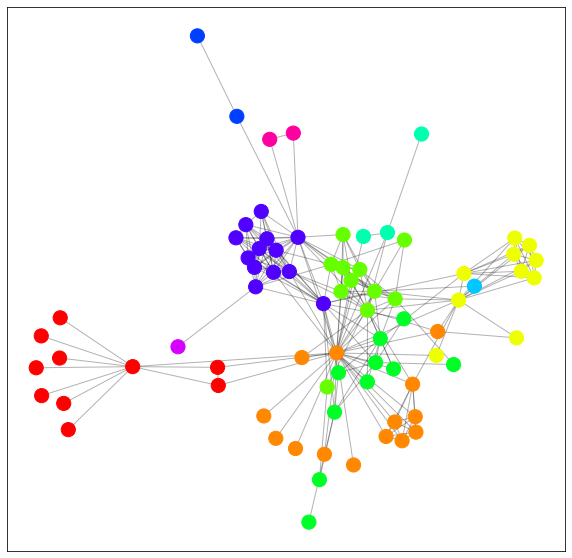

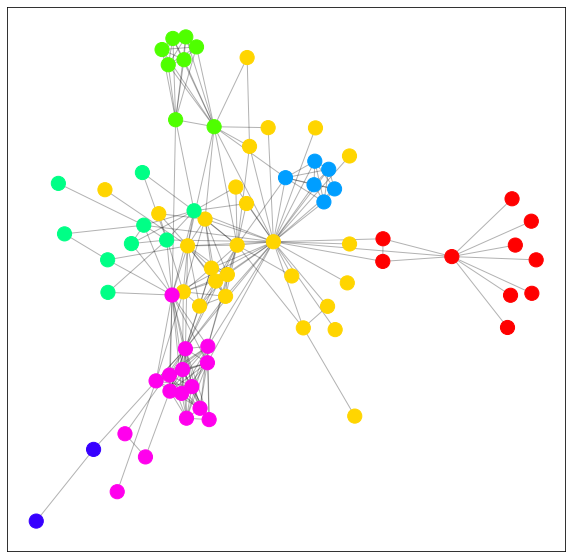

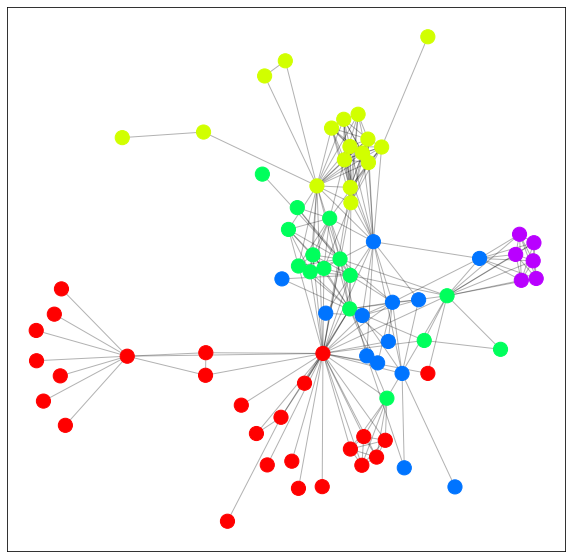

In [385]:
visual_com(lesmis, comd_GN_lesmis, 'Newman-Girvan')

visual_com(lesmis, lesmis_SP, 'Spectral Clustering')

visual_com(lesmis, lesmis_MM, 'Modularity Maximization')

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

Newman-Girvan method
Number of communities: 10
Spectral Clustering method
Number of communities: 11
Modularity Maximization method
Number of communities: 6


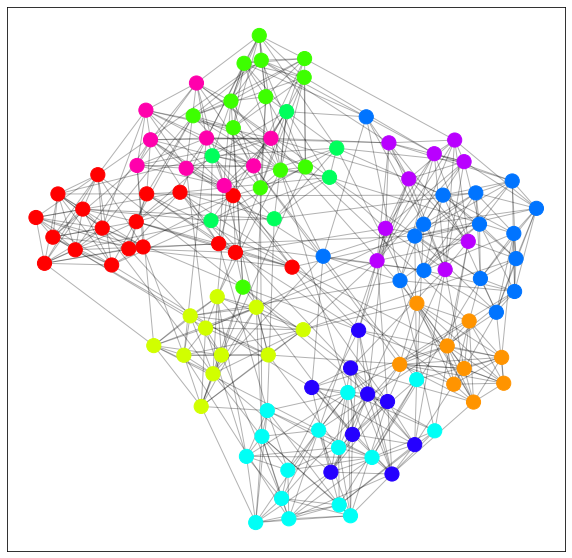

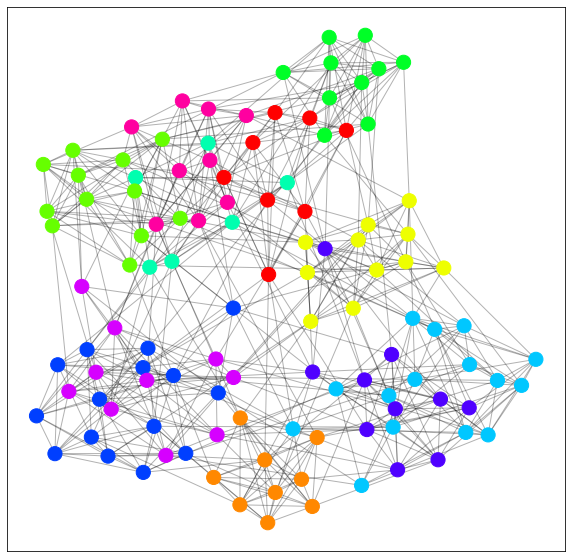

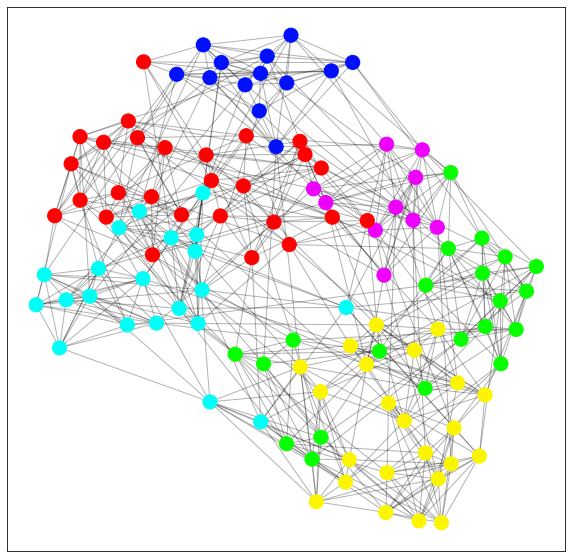

In [386]:
visual_com(football, comd_GN_football, 'Newman-Girvan')

visual_com(football, football_SP, 'Spectral Clustering')

visual_com(football, football_MM, 'Modularity Maximization')

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

Newman-Girvan method
Number of communities: 5
Spectral Clustering method
Number of communities: 7
Modularity Maximization method
Number of communities: 4


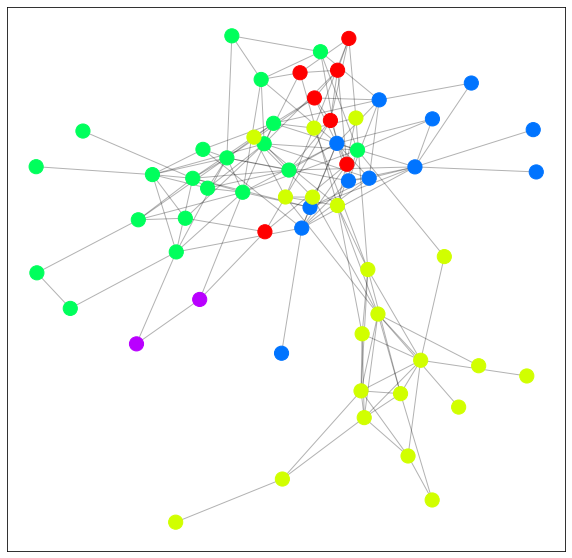

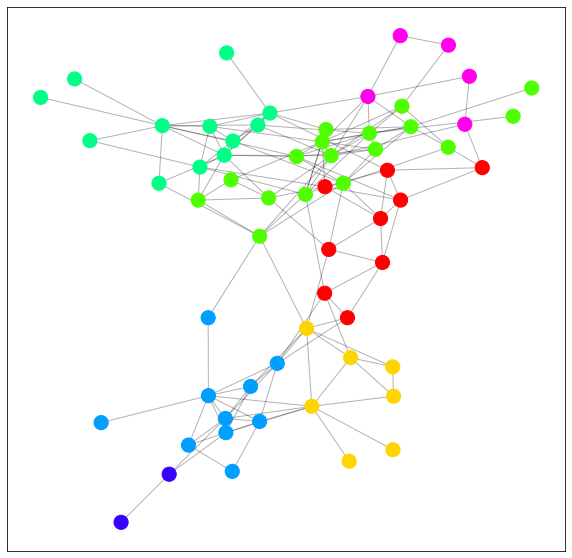

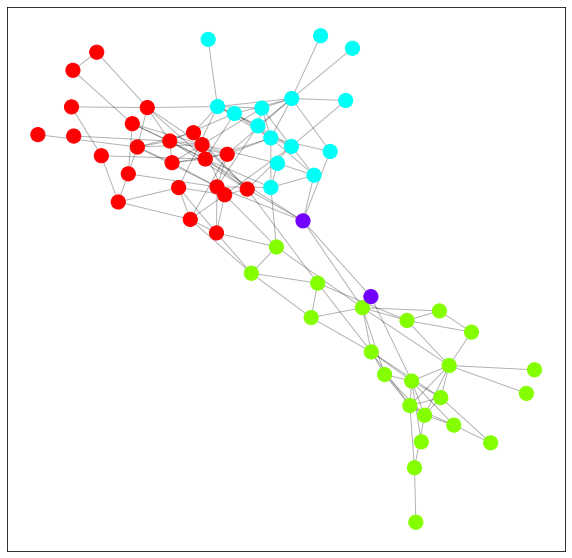

In [387]:
visual_com(dolphins, comd_GN_dolphins, 'Newman-Girvan')

visual_com(dolphins, dolphins_SP, 'Spectral Clustering')

visual_com(dolphins, dolphins_MM, 'Modularity Maximization')

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

Newman-Girvan method
Number of communities: 8
Spectral Clustering method
Number of communities: 9
Modularity Maximization method
Number of communities: 4


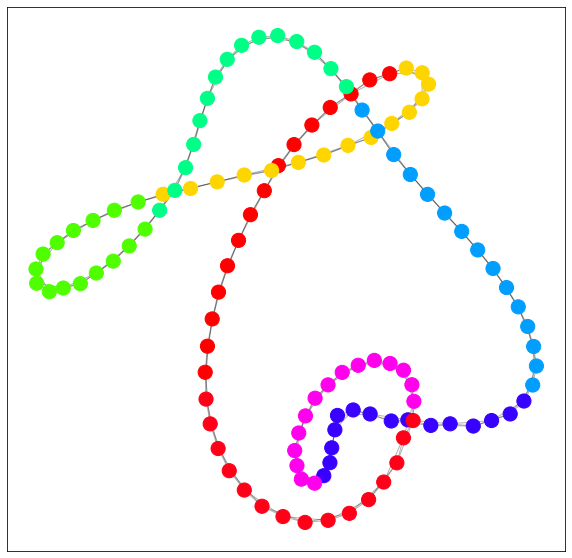

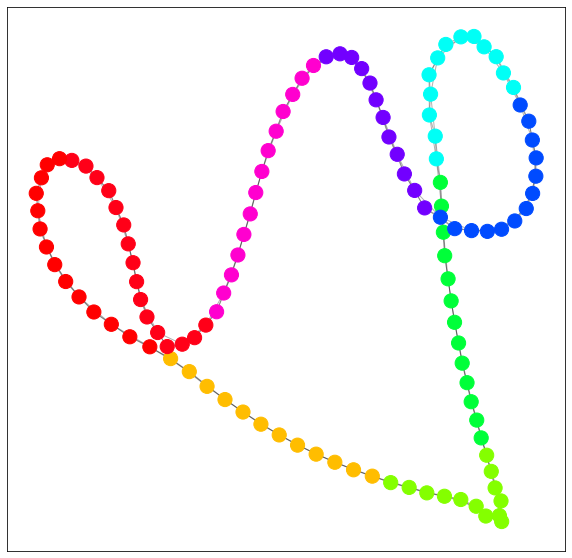

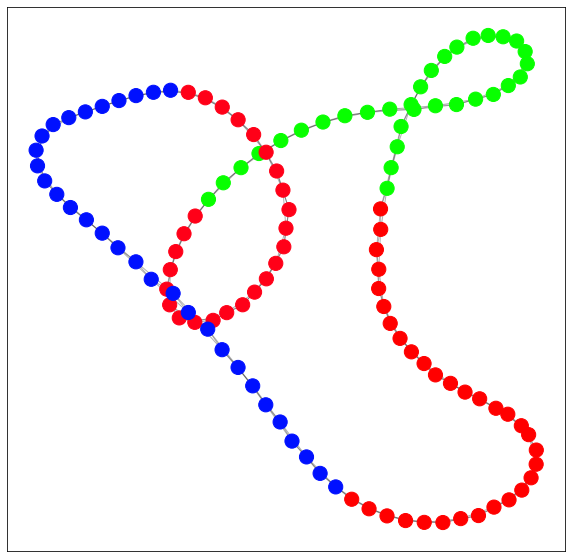

In [371]:
visual_com(REG, comd_GN_REG, 'Newman-Girvan')

visual_com(REG, REG_SP, 'Spectral Clustering')

visual_com(REG, REG_MM, 'Modularity Maximization')

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

Newman-Girvan method
Number of communities: 48
Spectral Clustering method
Number of communities: 10
Modularity Maximization method
Number of communities: 5


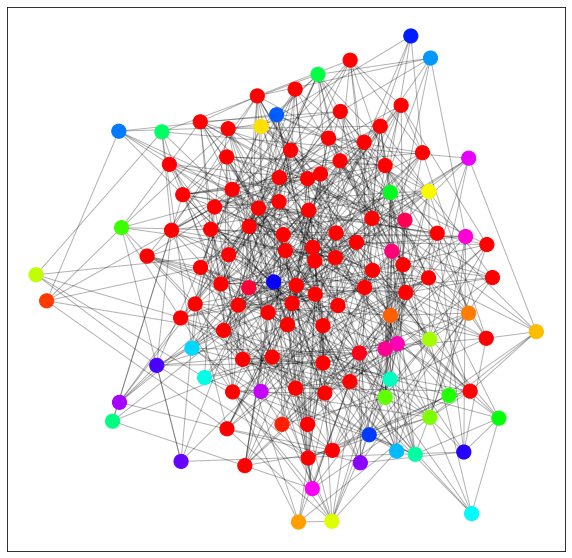

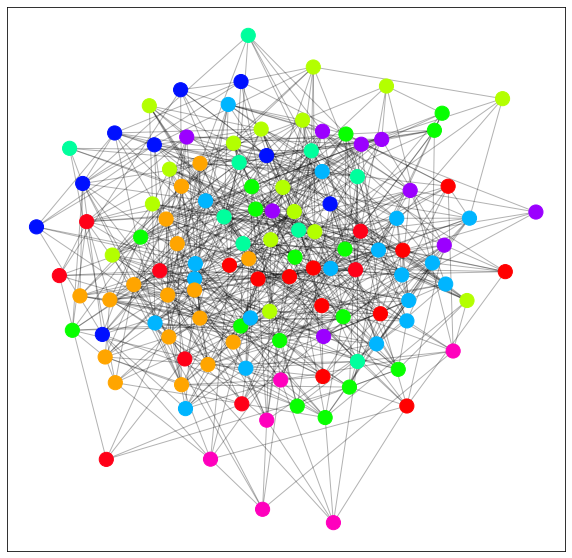

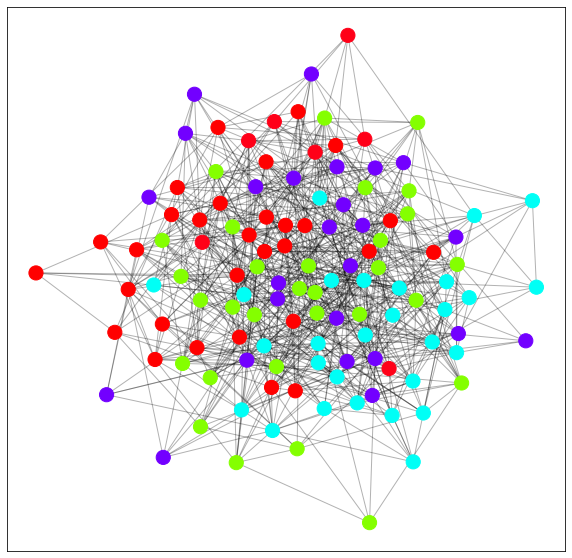

In [372]:
visual_com(RGER, comd_GN_RGER, 'Newman-Girvan')

visual_com(RGER, RGER_SP, 'Spectral Clustering')

visual_com(RGER, RGER_MM, 'Modularity Maximization')

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

Newman-Girvan method
Number of communities: 7
Spectral Clustering method
Number of communities: 11
Modularity Maximization method
Number of communities: 7


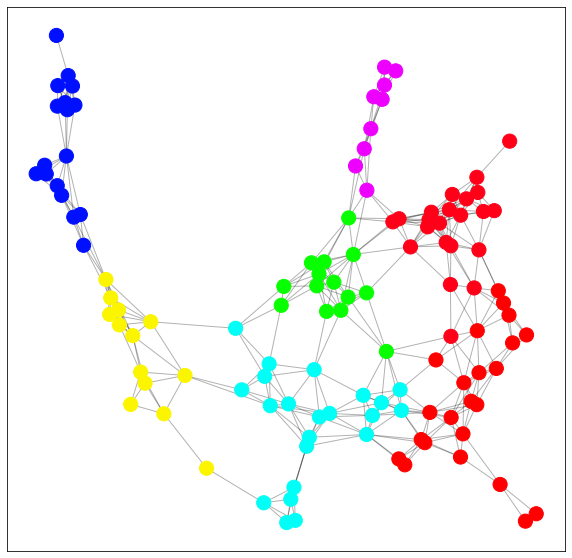

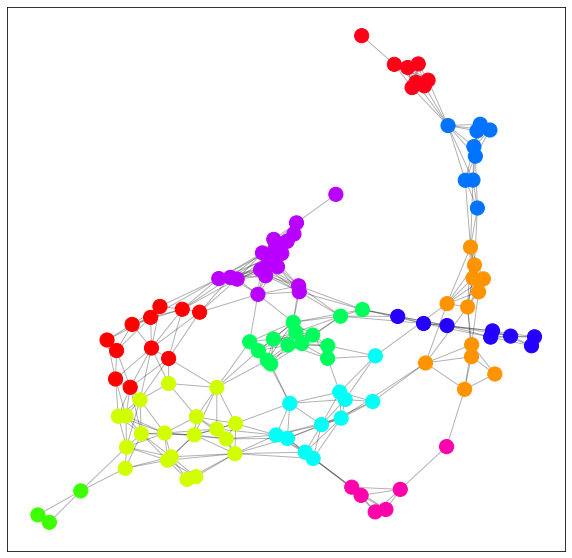

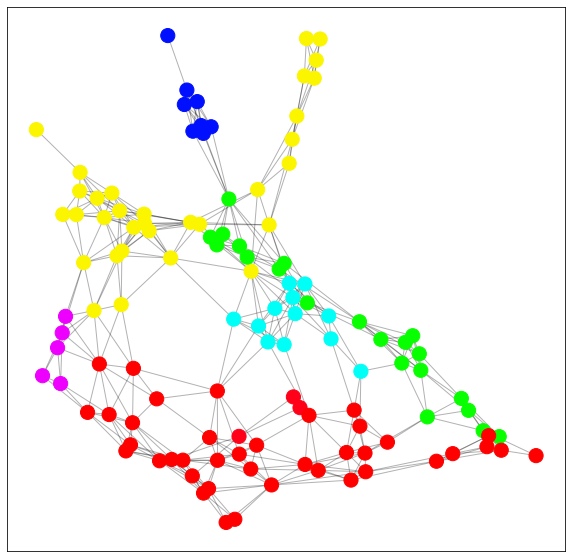

In [373]:
visual_com(RGG, comd_GN_RGG, 'Newman-Girvan')

visual_com(RGG, RGG_SP, 'Spectral Clustering')

visual_com(RGG, RGG_MM, 'Modularity Maximization')

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

Newman-Girvan method
Number of communities: 11
Spectral Clustering method
Number of communities: 10
Modularity Maximization method
Number of communities: 10


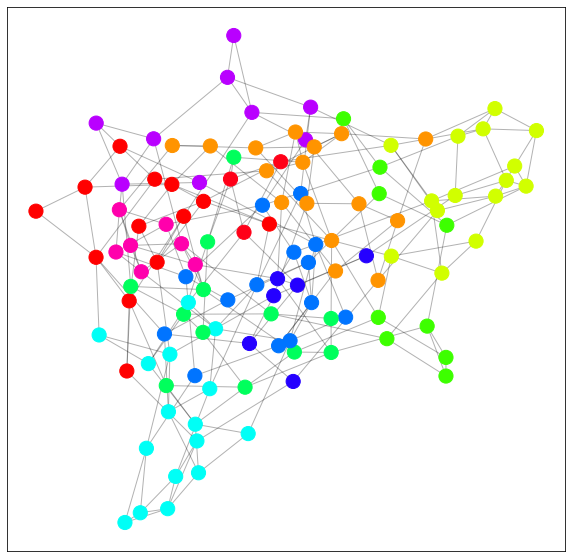

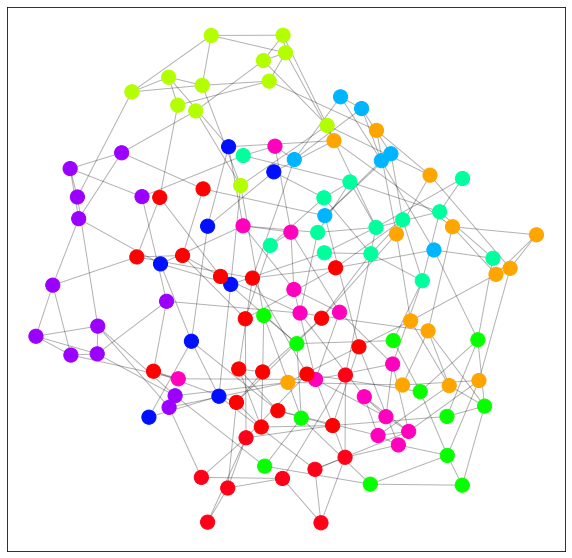

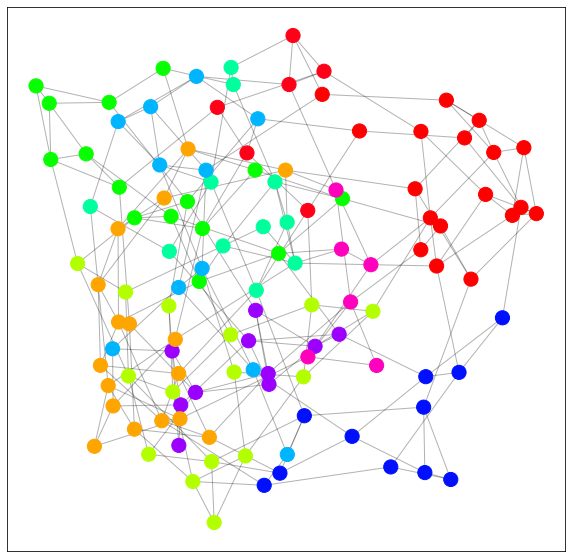

In [374]:
visual_com(SW, comd_GN_SW, 'Newman-Girvan')

visual_com(SW, SW_SP, 'Spectral Clustering')

visual_com(SW, SW_MM, 'Modularity Maximization')

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

Newman-Girvan method
Number of communities: 35
Spectral Clustering method
Number of communities: 11
Modularity Maximization method
Number of communities: 7


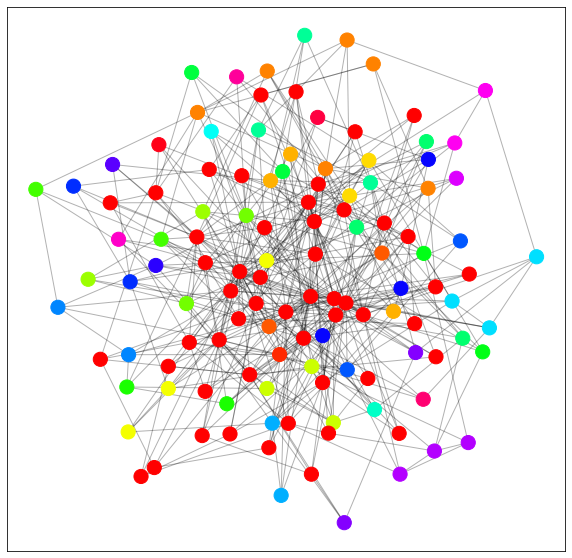

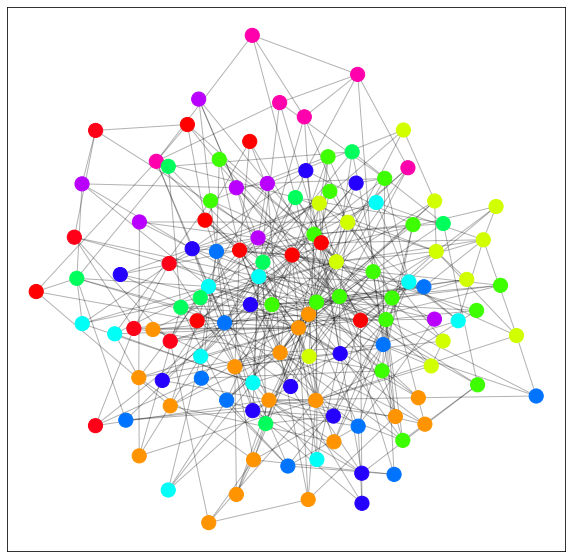

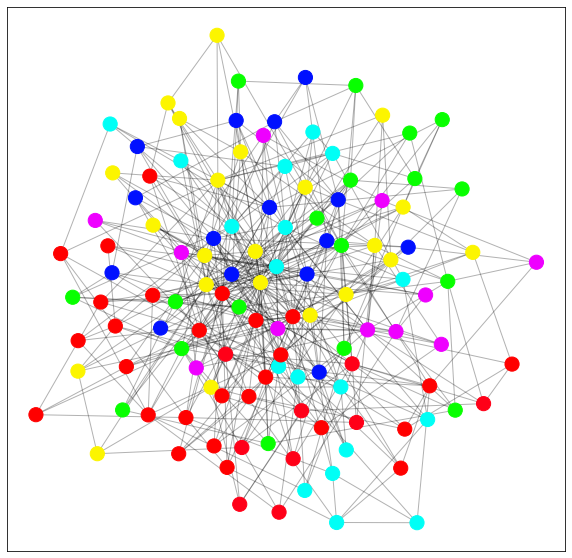

In [375]:
visual_com(SF, comd_GN_SF, 'Newman-Girvan')

visual_com(SF, SF_SP, 'Spectral Clustering')

visual_com(SF, SF_MM, 'Modularity Maximization')

**REG**: Από το γράφημα παραπάνω είναι εύκολο να δούμε ότι ο γράφος χωρίζεται σε ισομηκής περιοχές που περιέχουν διπλανούς κόμβους. Γενικά ο αριθμός των κοινοτήτων είναι αρκετά μικρός.</br>
**RGER**: Από τον γράφο αυτό είναι δύσκολο να βγάλουμε κάποιο ξεκάθαρο συμπέρασμα. Το πλήθος των ακμών είναι πολύ μεγάλο για να διακρίνουμε τις διάφορες περιοχές.  Παρ'όλα αυτά παρατηρούμε τον πολύ μεγάλο αριθμό κοινοτήτων για την μέθοδο NG, γεγονός χαρακτησριστικό μόνο σε αυτό το γράφο.</br>
**RGG**:Εδώ οι κοινότητες δημιουργούνται γύρω από γράφος που βρίσκονται σε μικρή γεωγραφική απόσταση μεταξύ τους και γενικά είναι λίγες σε πλήθος.</br>
**SF**: Και εγώ χαρακτηριστικό είναι ο μεγάλος αριθμός κοινοτήτων. Βλέπουμε ότι υπάρχει μια κοινότητα που περιλαμβάνει όλους τους γράφους με μεγάλο βαθμό. Και εδώ υπάρχει μεγάλη διαφορά μεταξύ του πλήθους των κοινοτήτων μεταξύ των μεθόδων.</br>
**SW**: Στον SW, οι κοινότητες δημιουργούνται όπως περιμέναμε, με τους μεταξύ τους συνδεδεμένους κόμβους να ανήκουν σε μια κοινότητα και το πλήθος των κοινοτήτων είναι σχεδόν ίδιο μεταξύ των αλγορίθμων.</br>
**Football**: Εδώ είναι φανερές οι διαφορετικές αθλητικές κατηγορίες στις οποίες παίζουν οι ομάδες, καθώς κάθε ομάδα ανήκει στην αντίστοιχη κοινότητα/κατηγορία.</br>
**Les Miserables**:  Ο γράφος αυτός φαίνεται να έχει αρκετά από τα χαρακτηριστικά του SW με τους κοντινά συνδεδεμένους κόμβους να ανήκουν στην ίδια κοινότητα.</br>
**Dolphins**: Εδώ παρατηρούμε ότι οι κοινότητες δημιουργούνται γύρω από κόμβους που είναι κομμάτια ελάχιστων μονοπατιών για άλλους. 